## __1 - Business Problem__  
___Forecast the airlines data set. Prepare a document for each model explaining how many dummy variables you have created and RMSE value for each model. Finally which model you will use for Forecasting___  

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## __2 - Data collection and description__ 

In [85]:
df = pd.read_excel("AirlinesData.xlsx")

In [86]:
df.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


Dataset is Univarient Time Series Data i.e Date Vs Target

Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [87]:
df.shape

(96, 2)

dataset has 96 rows and 2 columns.

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [89]:
df.isnull().sum()

Month         0
Passengers    0
dtype: int64

No Missing values and datatype also identified accuretly

In [90]:
# Summary of numerical attributes:
# In essence, it is descriptive statistics (count, mean, standard deviation, minimum value, maximum value, and 25% - 50% - 75% percentile)
df.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


describe function shows only numerical columns information

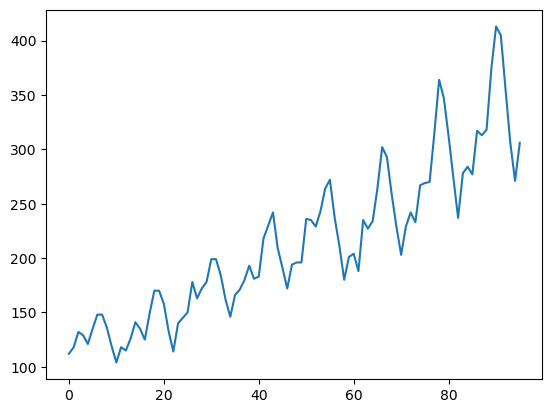

In [91]:
#line plt
df.Passengers.plot()
plt.show()

It shows dataset has exponetial trends with multiplicative seasonality

# 3 - Histogram and Density Plots of target column

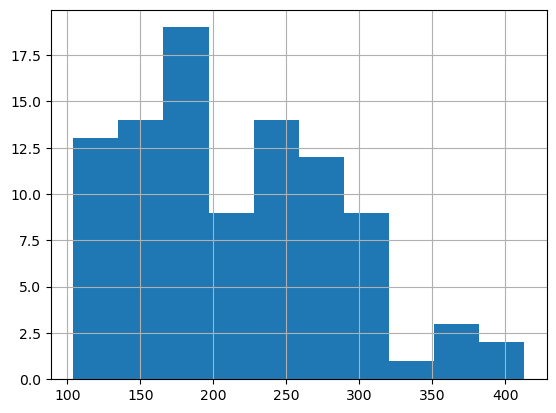

In [92]:
# target should be normally distributed if not then treat it
df['Passengers'].hist()
plt.show()

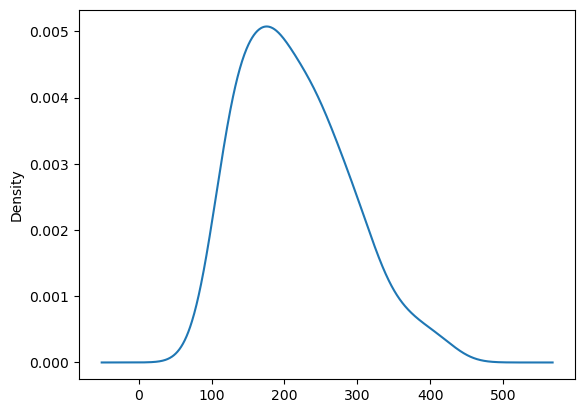

In [93]:
# create a density plot
df['Passengers'].plot(kind='kde')
plt.show()

Sales column is slightly Right skewed.

So we have to apply square-root transformation to convert it into normal distribution.

Sales have average value between 200 and standard deviation is in range of 150-250.

In [94]:
df.skew()

Passengers    0.637375
dtype: float64

If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

<AxesSubplot:>

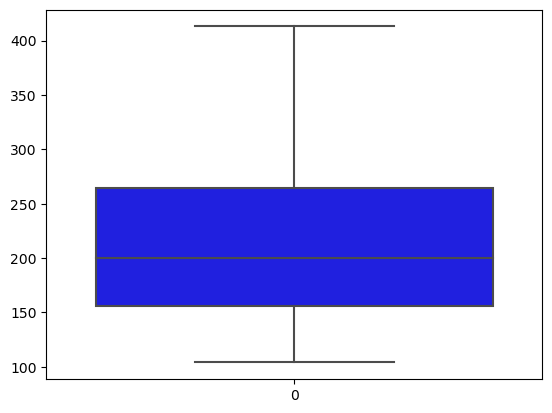

In [95]:
sns.boxplot(data=df['Passengers'],color='blue')

Passenger colunm is slightly right skewd with majority of data is in range of 12 to 16 with median value is 14

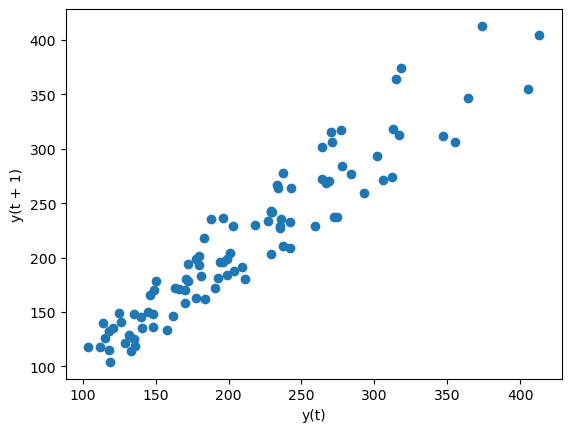

In [96]:
# lagplot-it is scatterplot between target Vs target with 1 delay(lag)
from pandas.plotting import lag_plot
lag_plot(df['Passengers'])
plt.show()

from above lag plot it shows that,feature and target are highly positively correlated with each other,That means  Forecasting for Passangers are possible

# 4 - Moving Average

<AxesSubplot:>

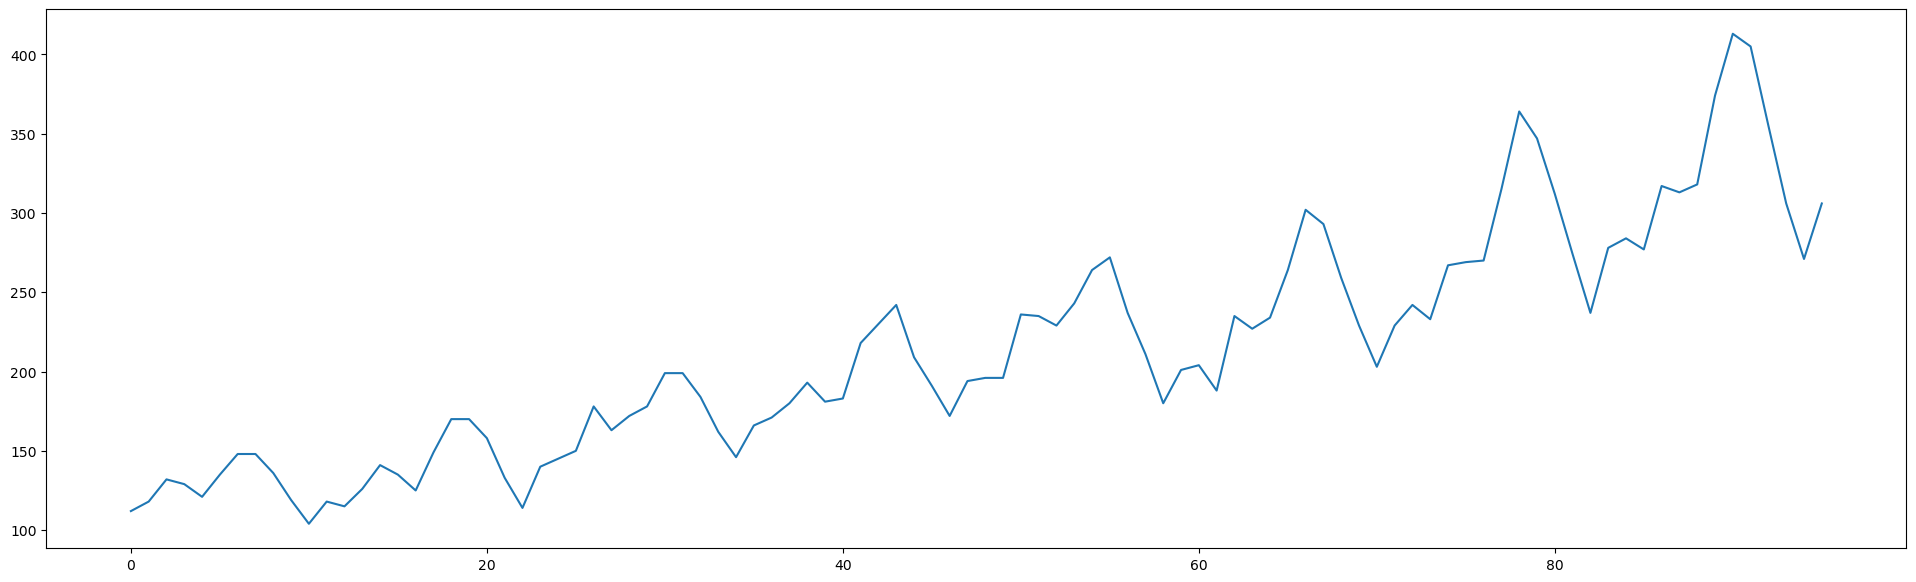

In [97]:
plt.figure(figsize=(24,7))
df.Passengers.plot()

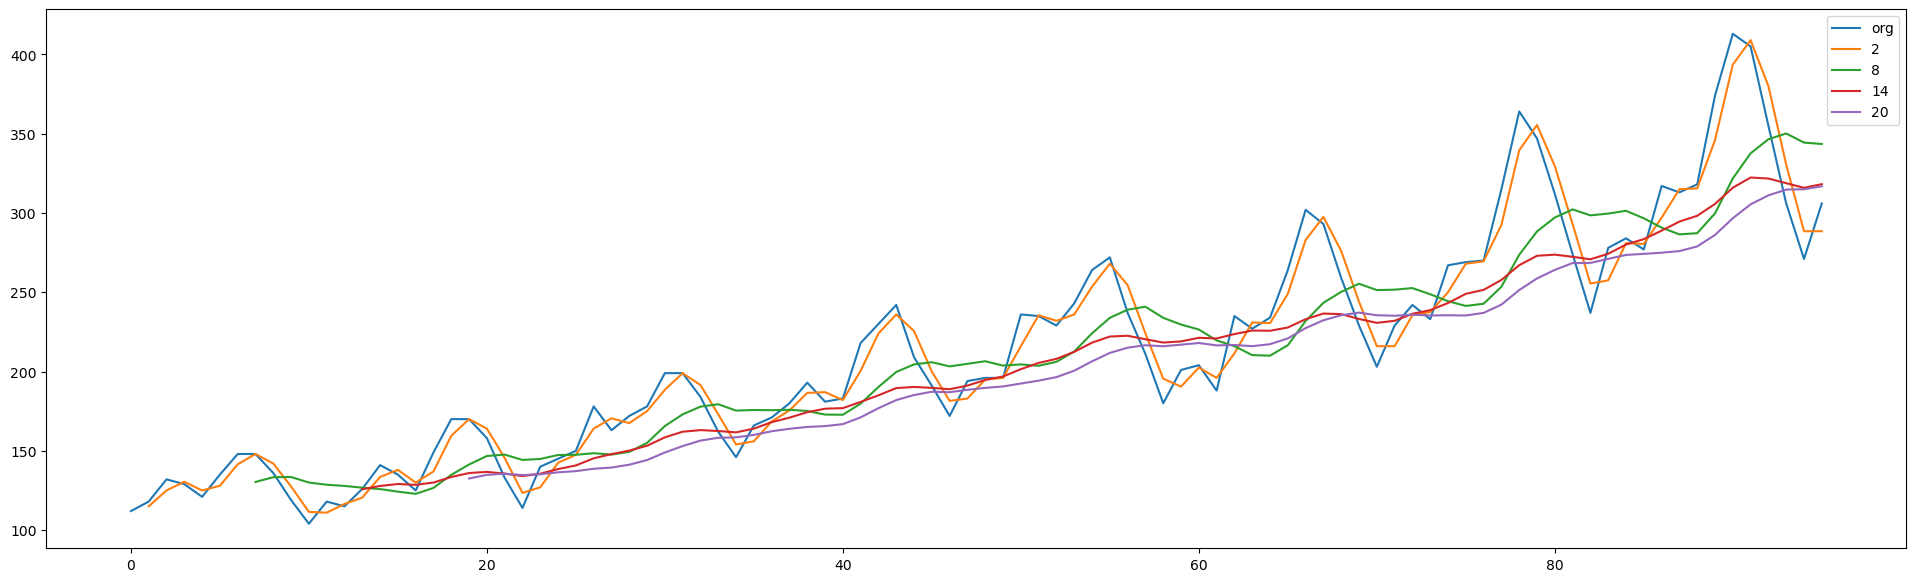

In [98]:
plt.figure(figsize=(24,7))
df.Passengers.plot(label="org")
for i in range(2,24,6):
    #plt.figure(figsize=(24,7))
    df["Passengers"].rolling(i).mean().plot(label=str(i))
    #plt.title("MA"+str(i))
plt.legend(loc='best')

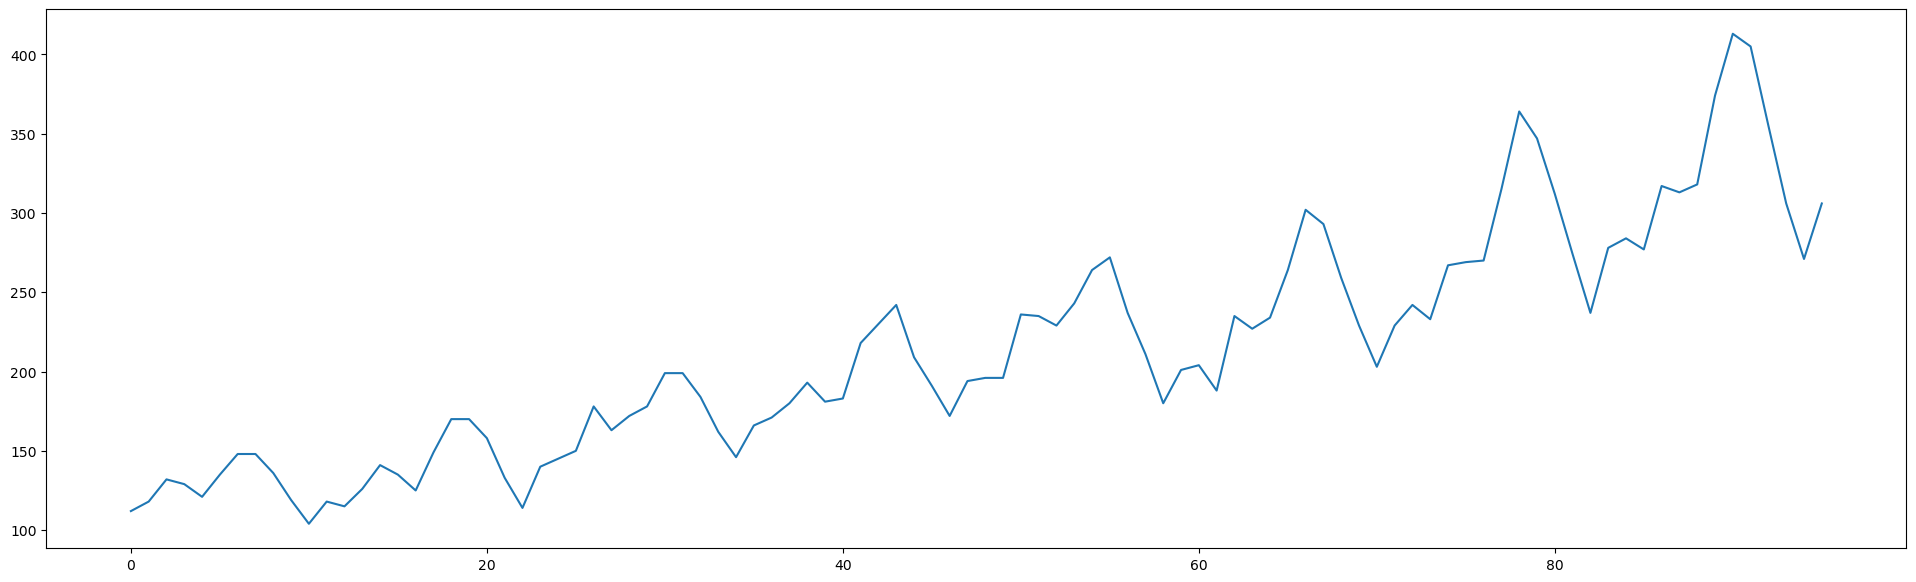

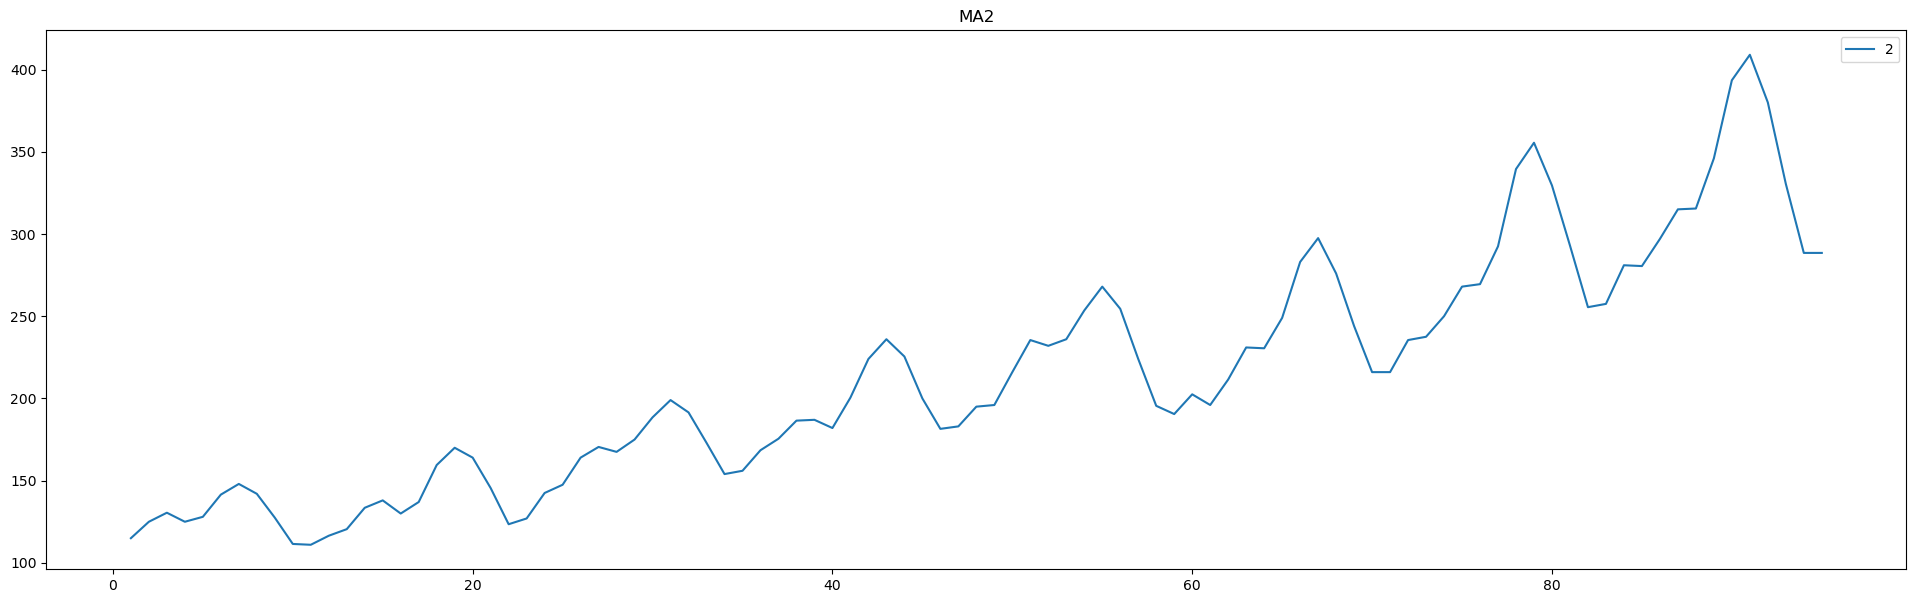

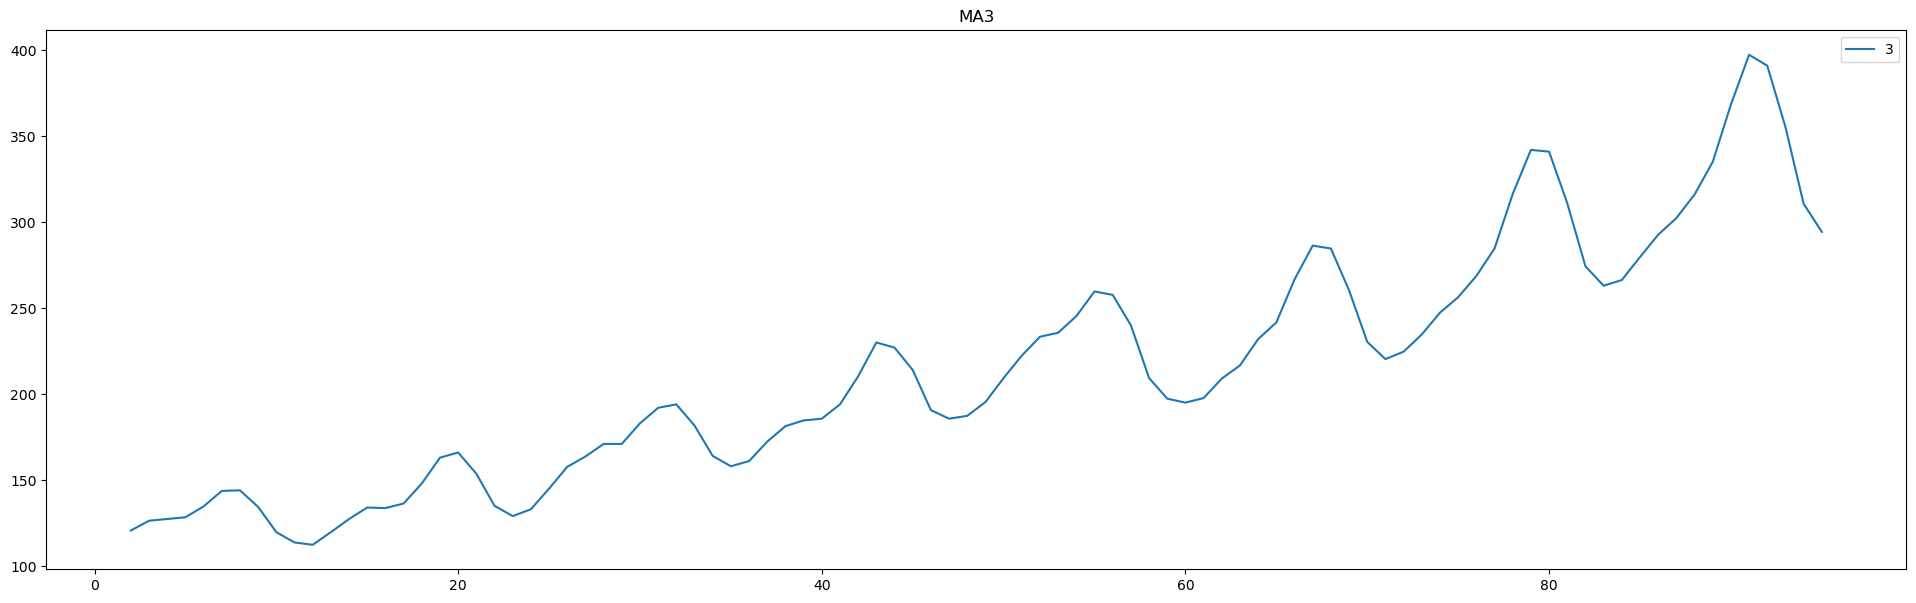

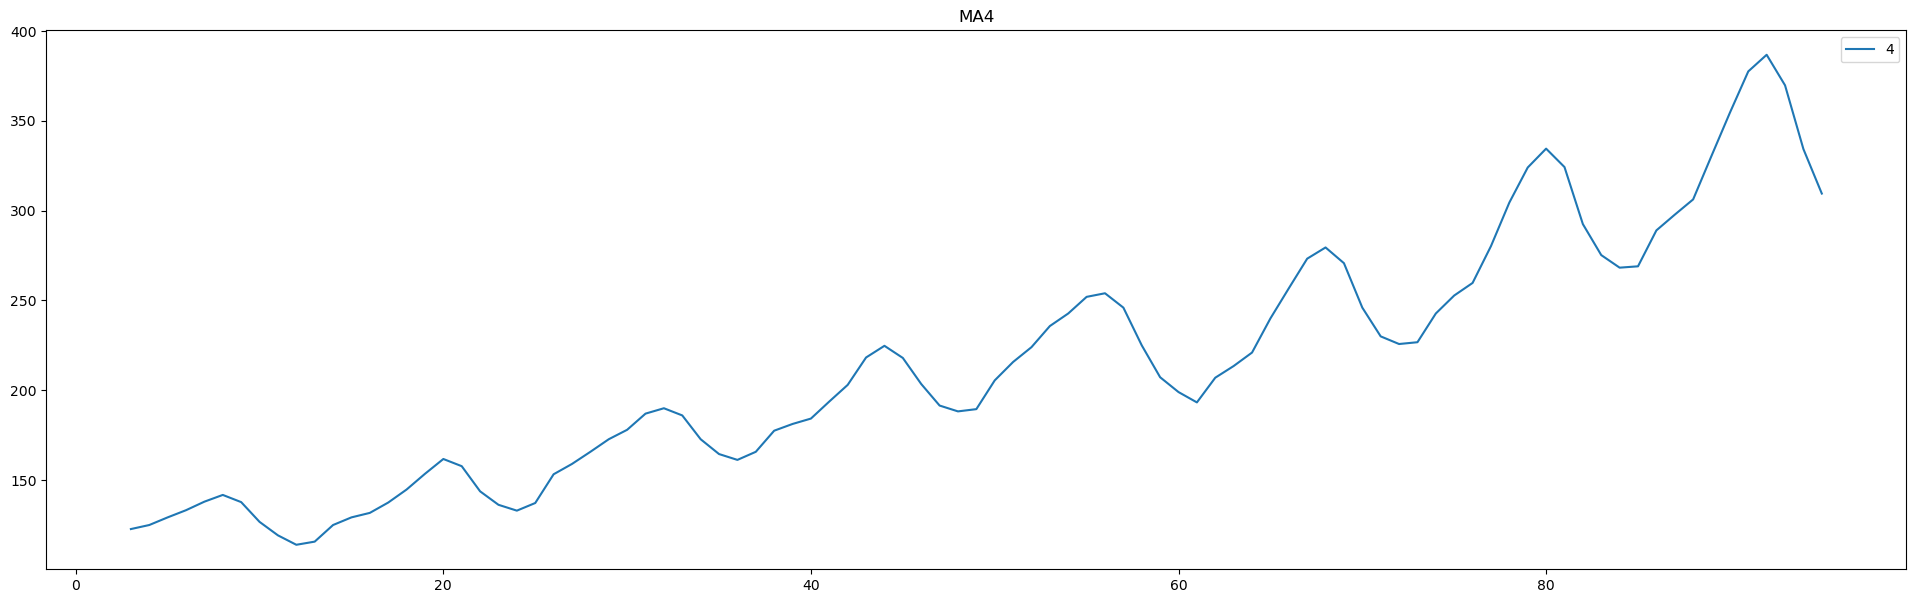

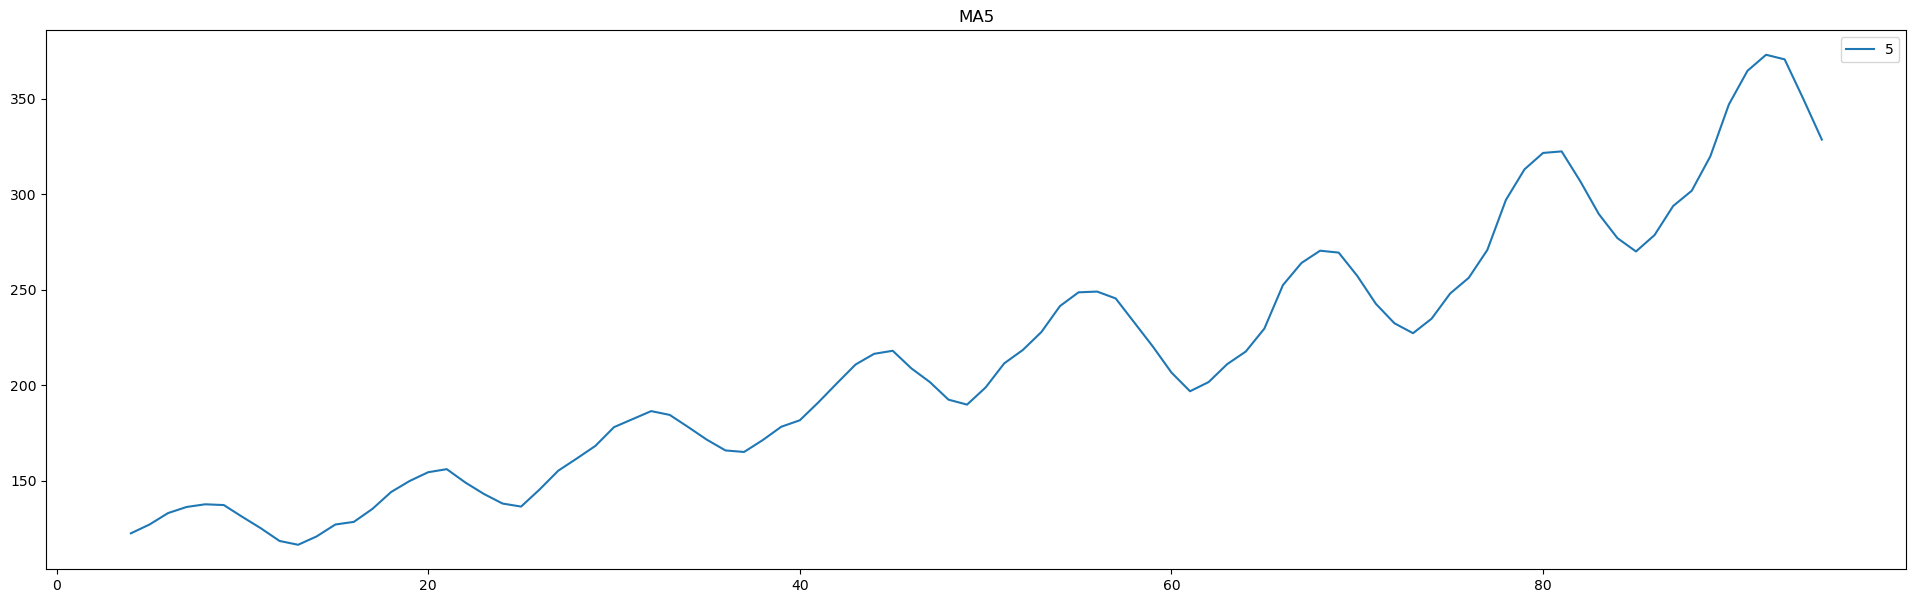

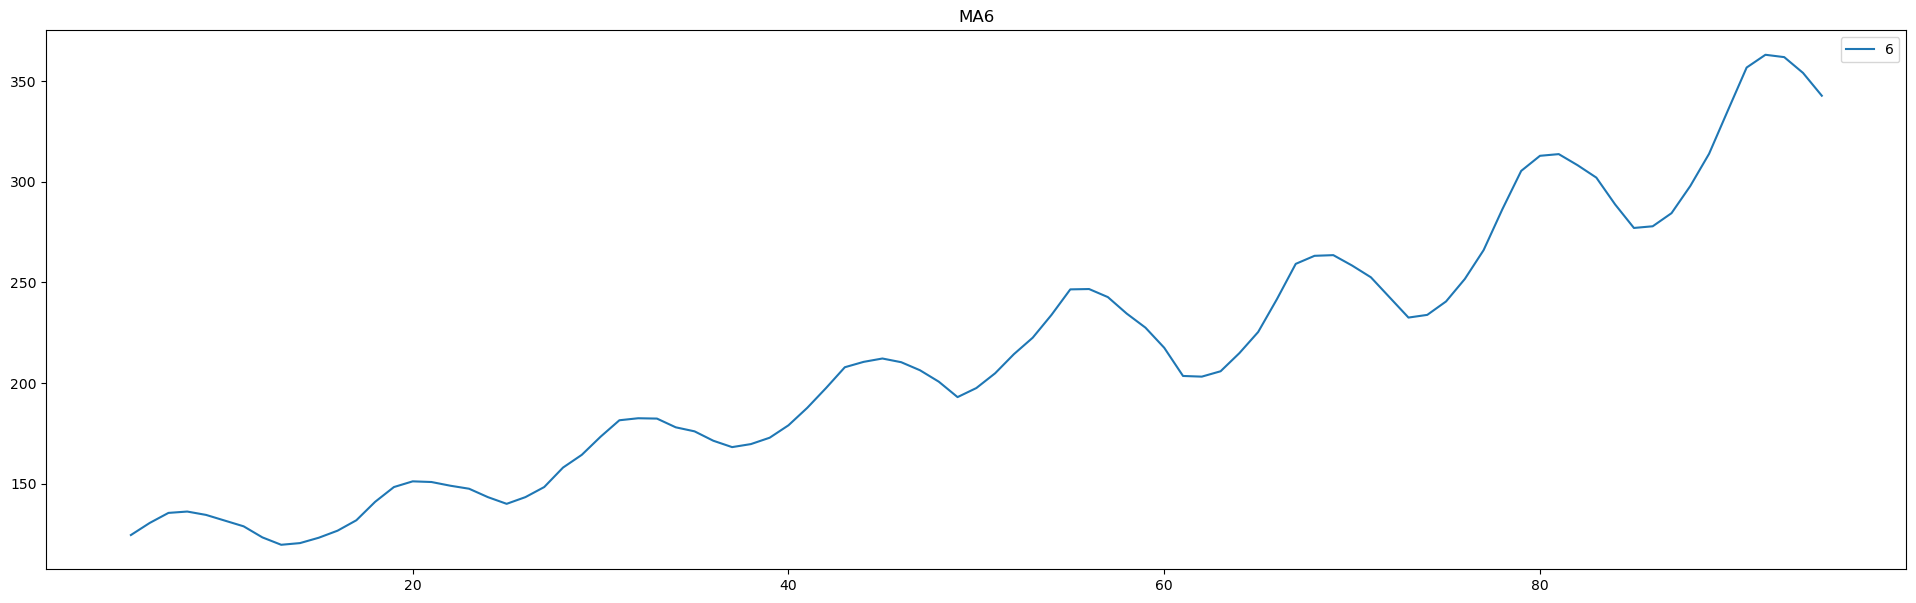

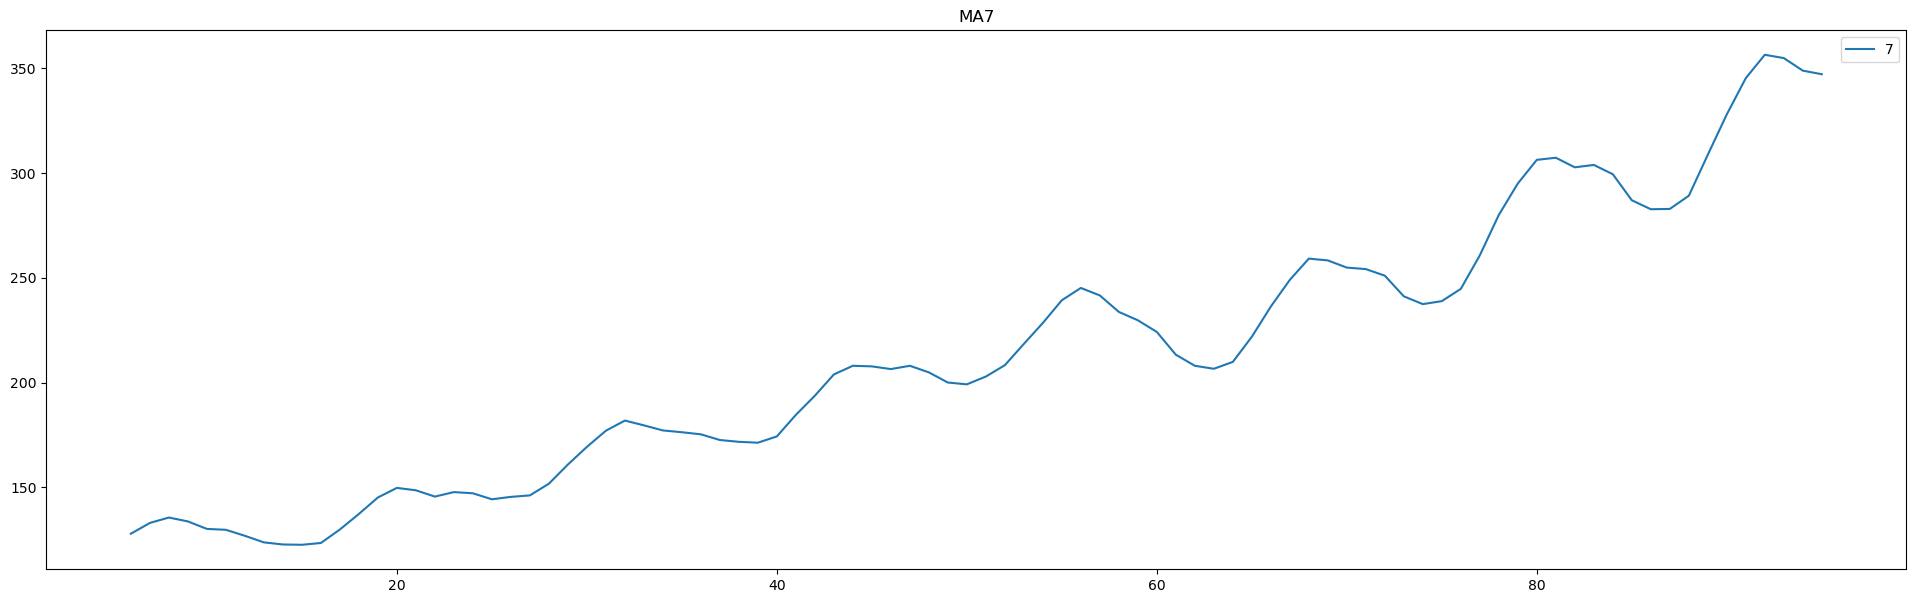

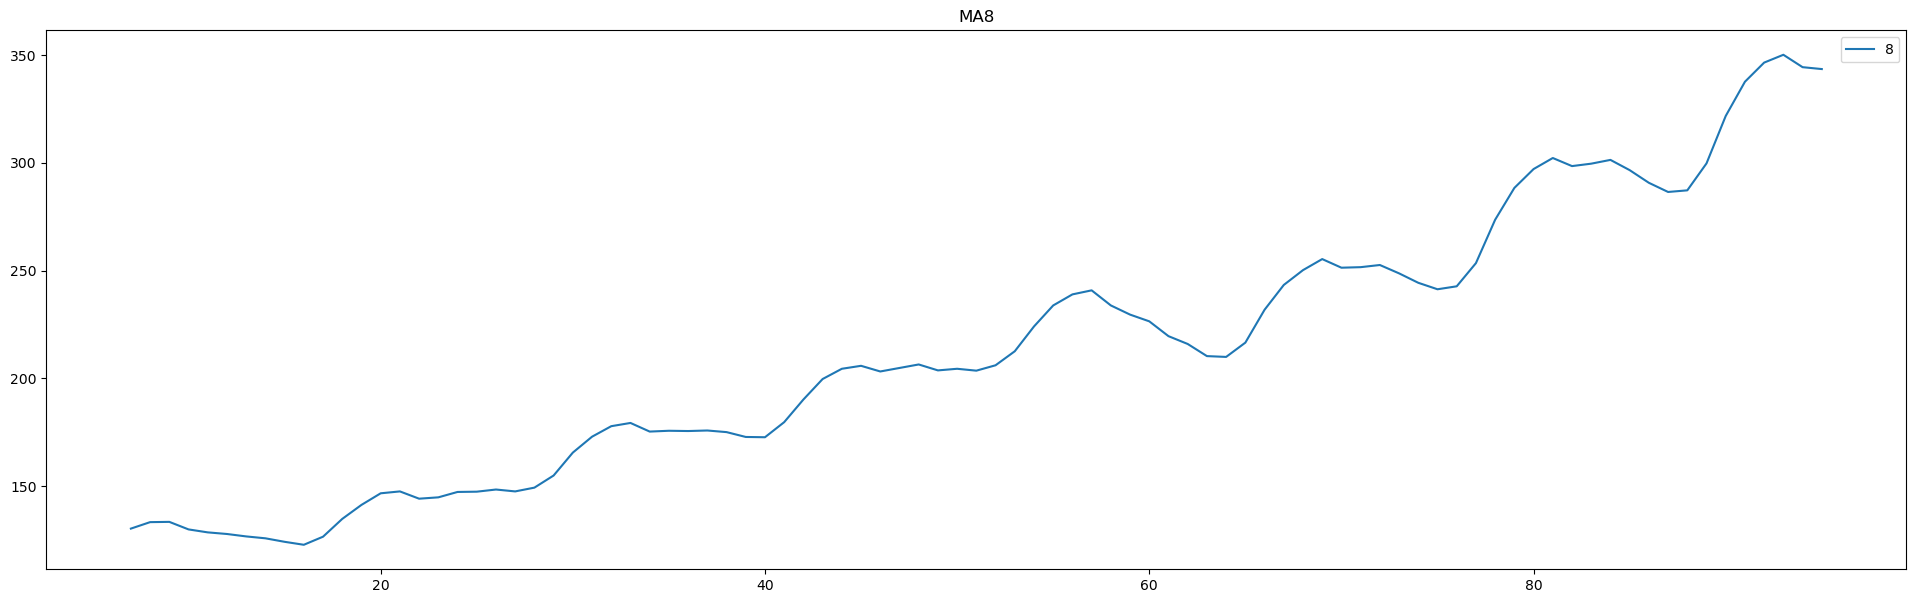

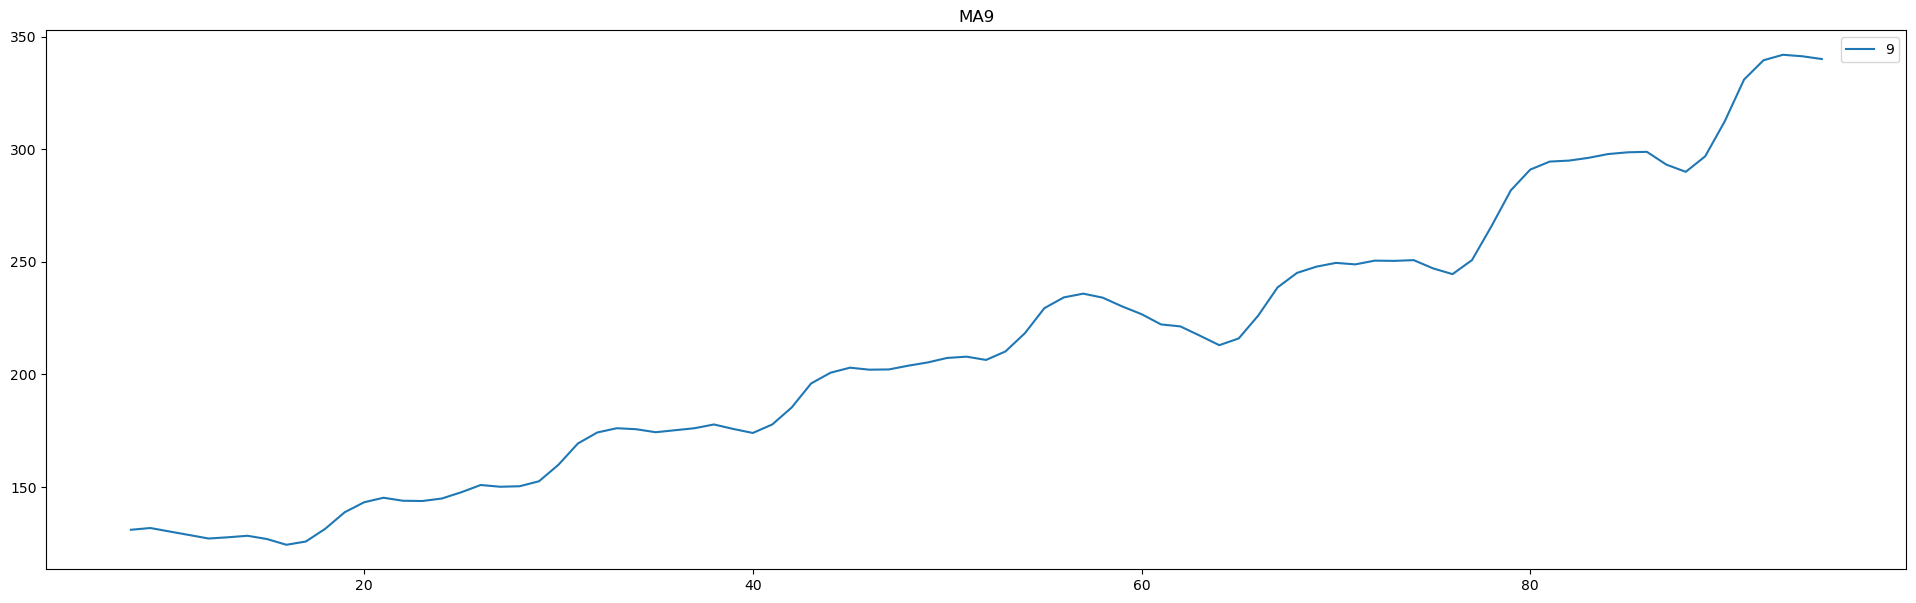

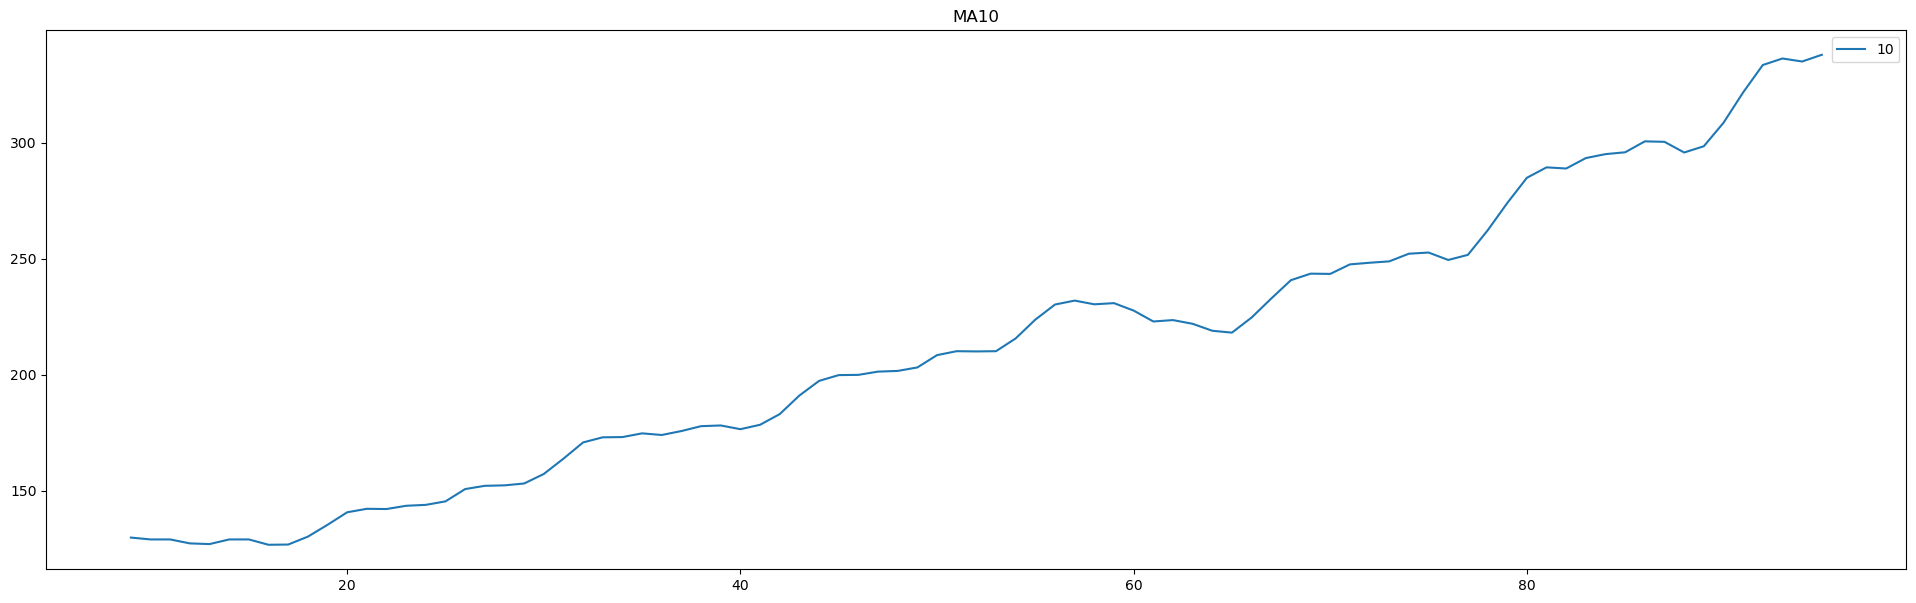

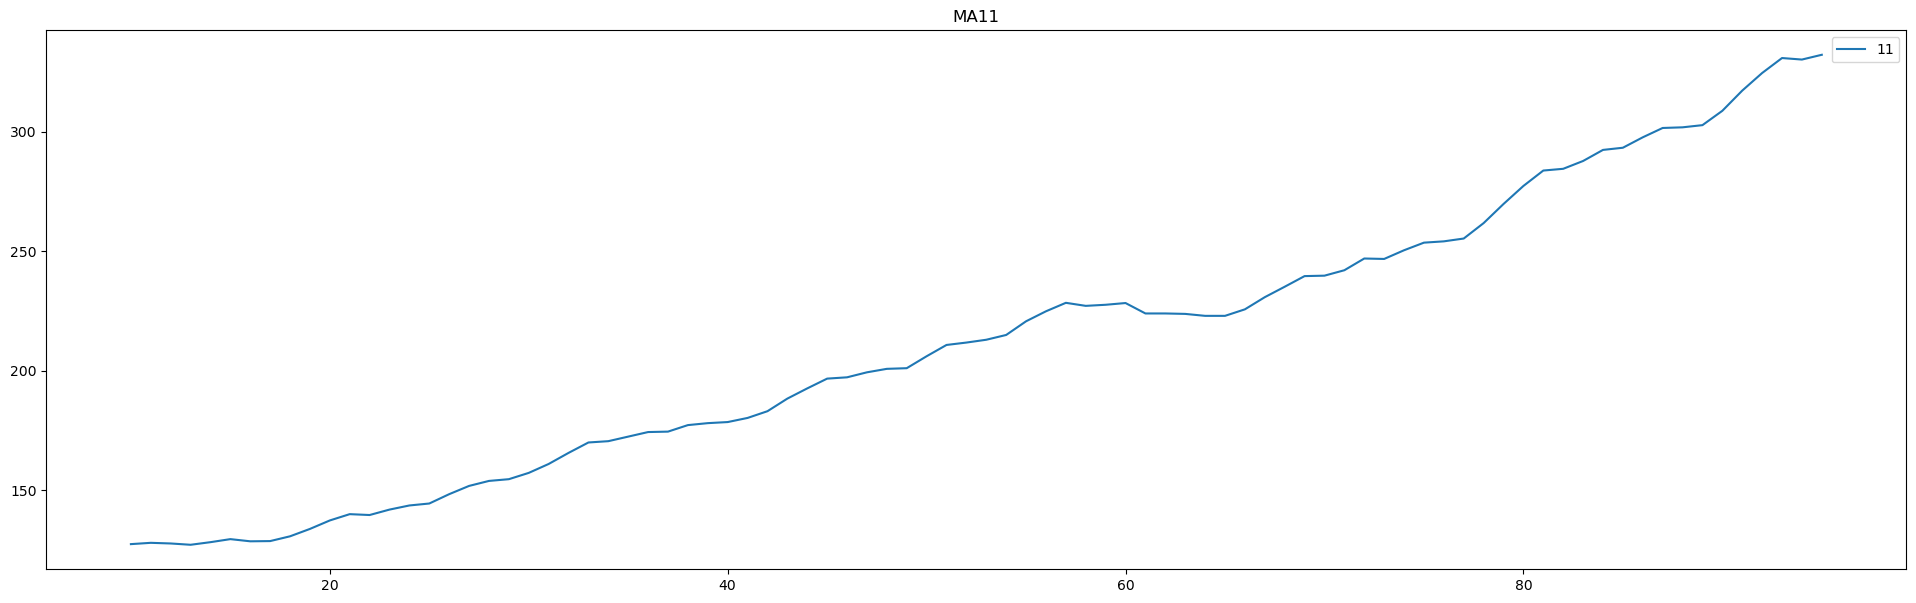

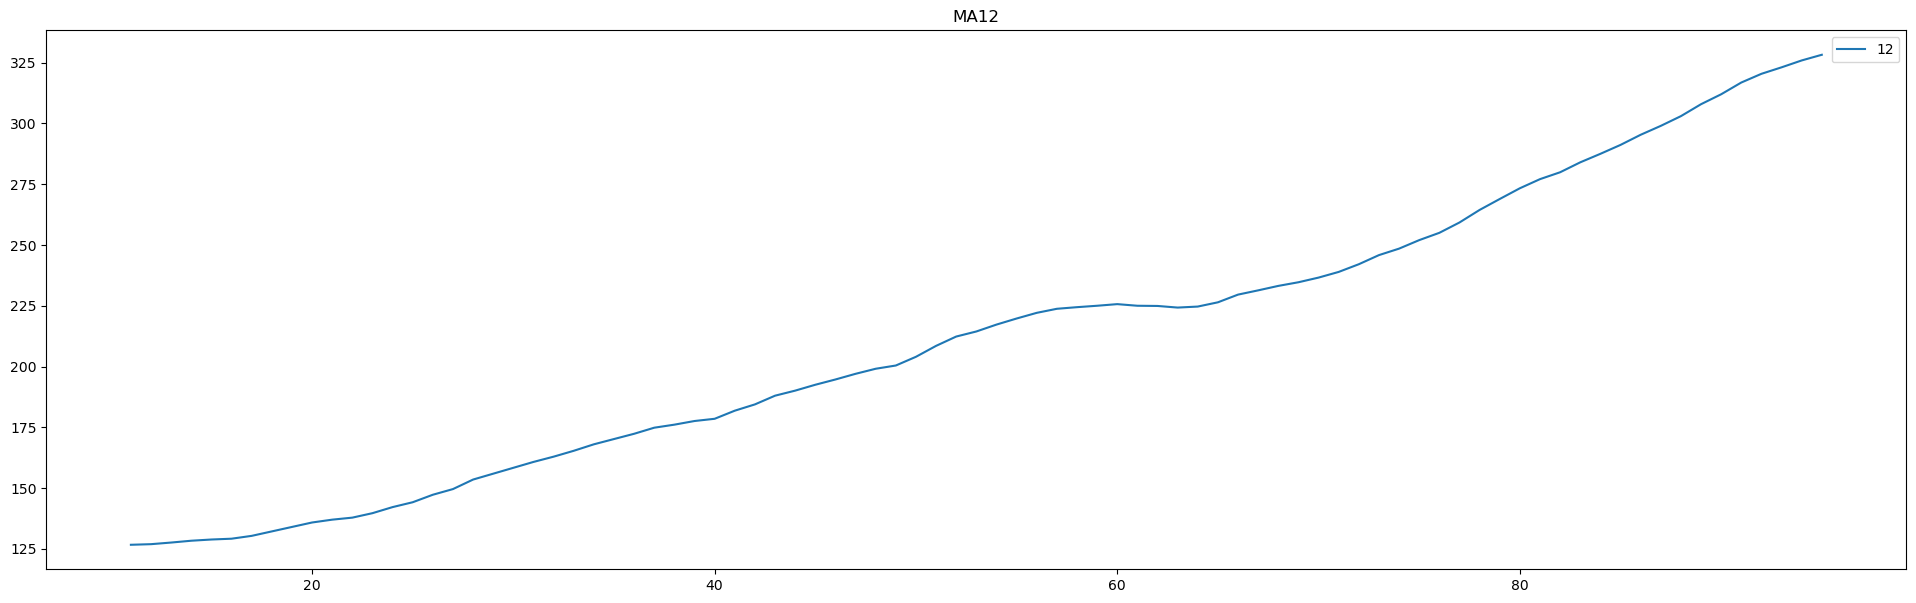

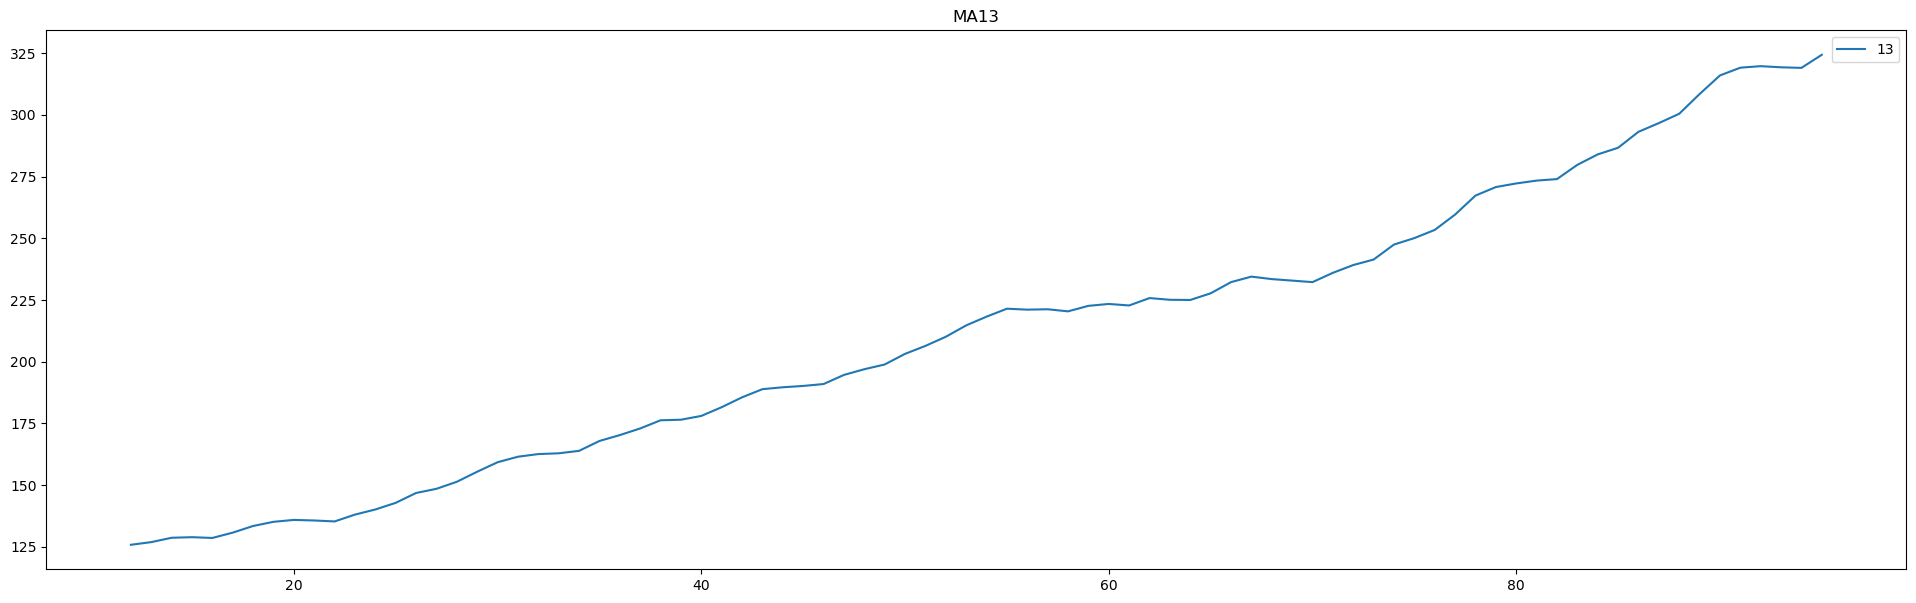

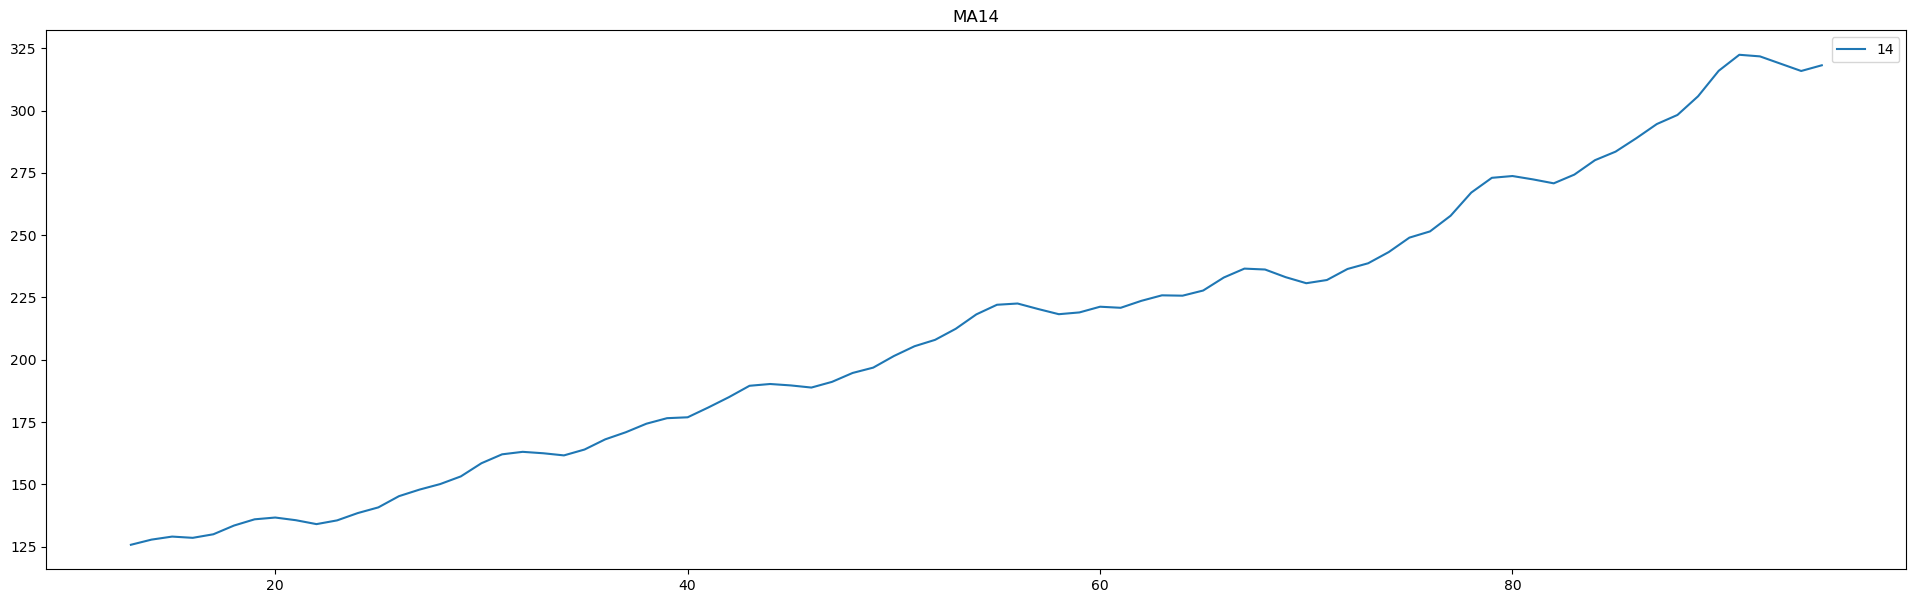

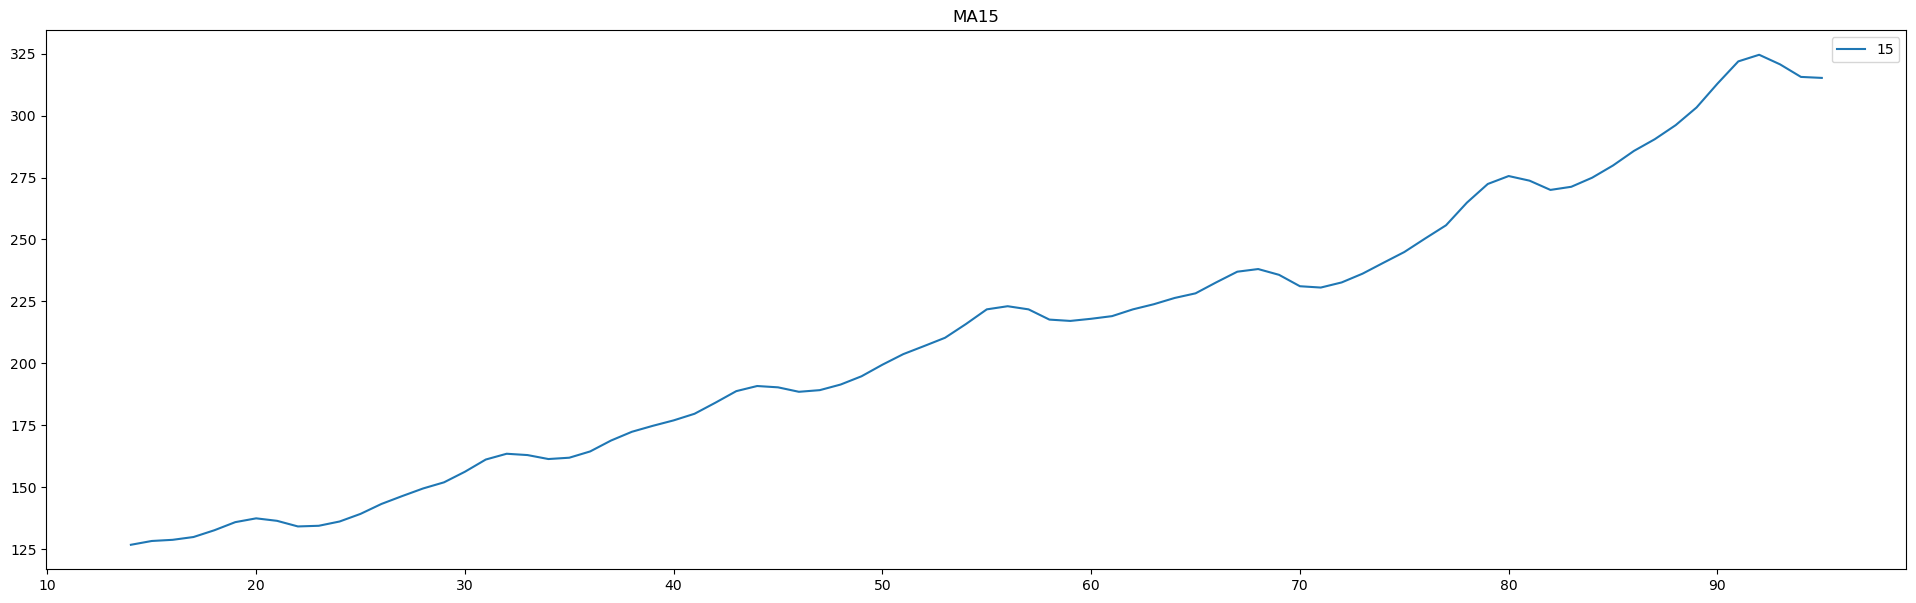

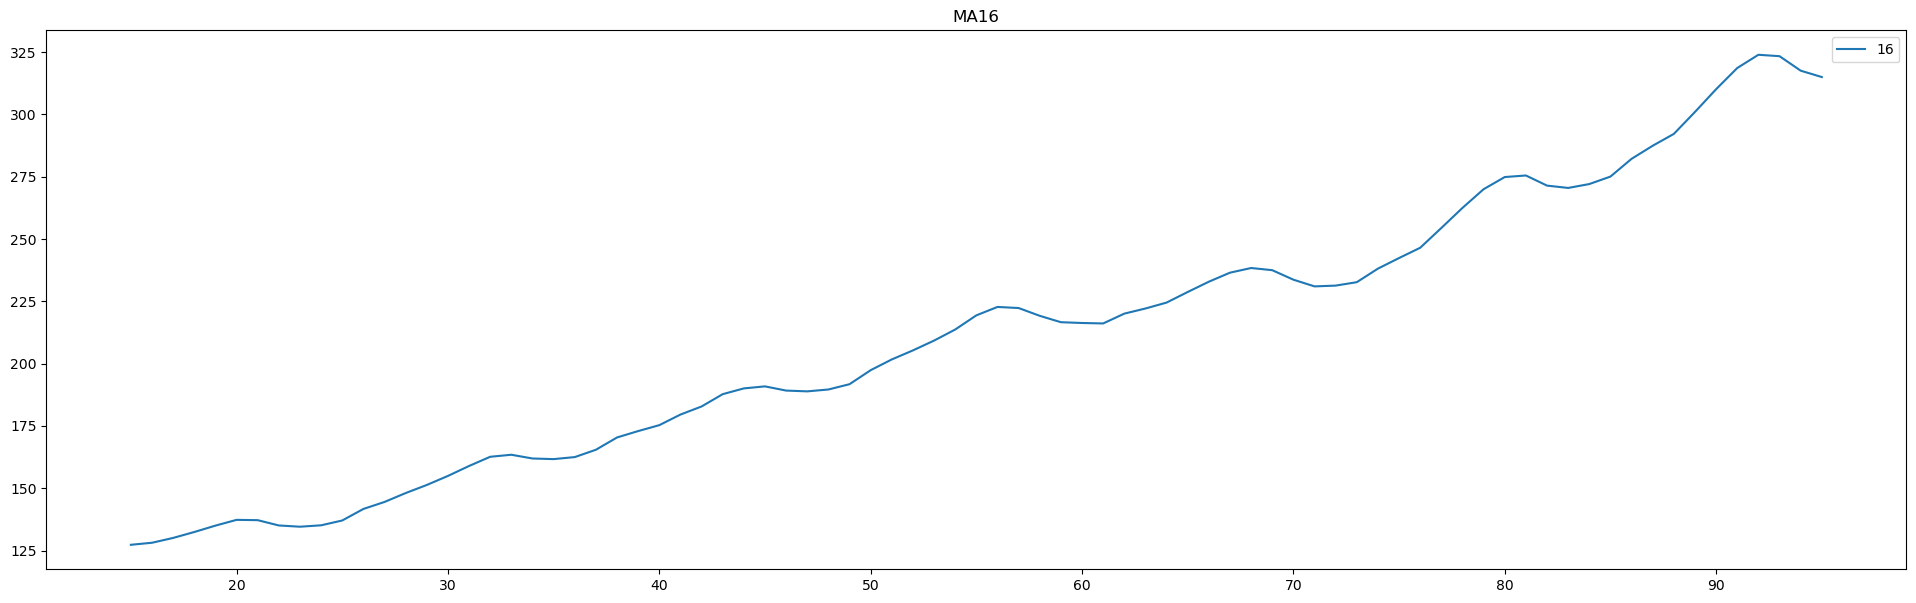

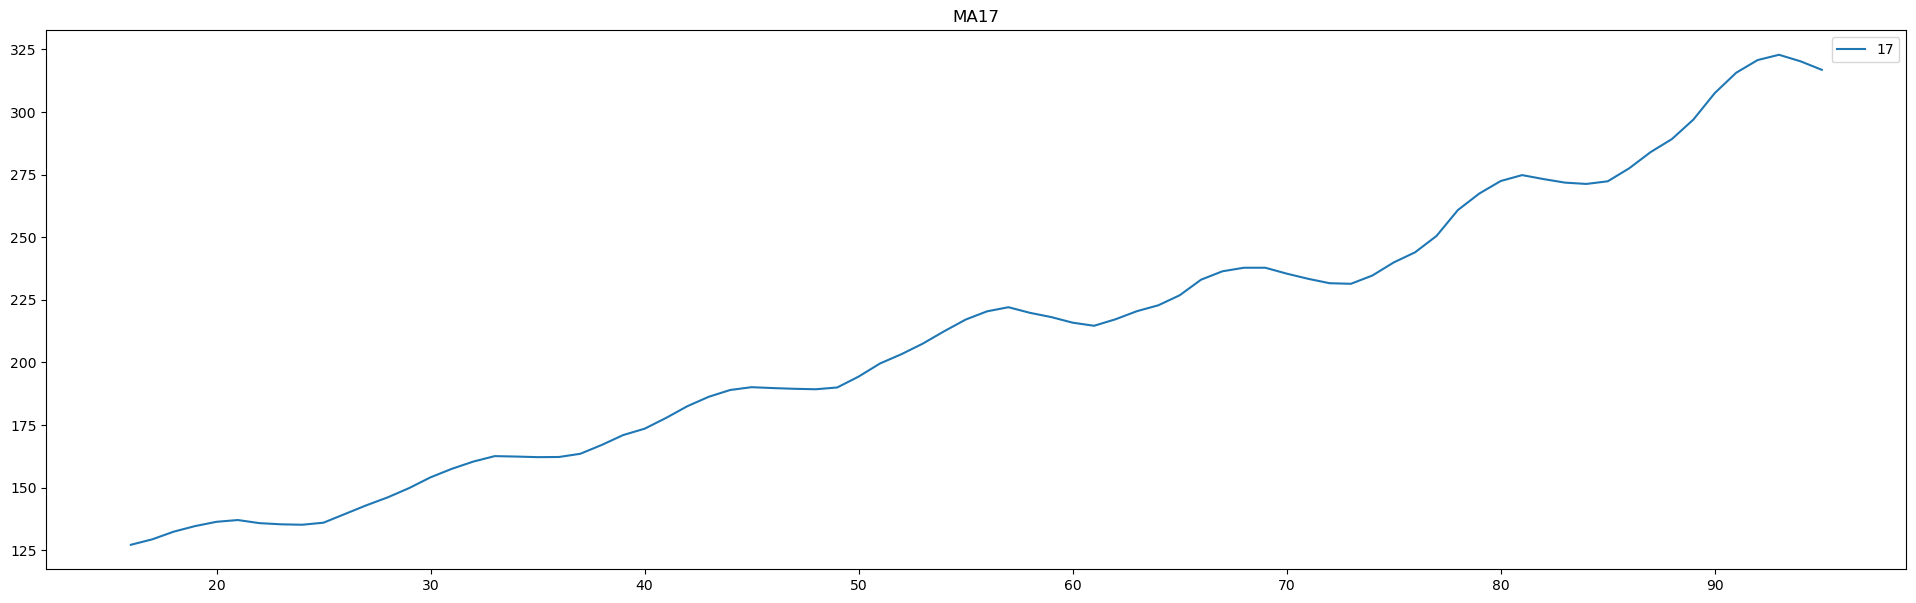

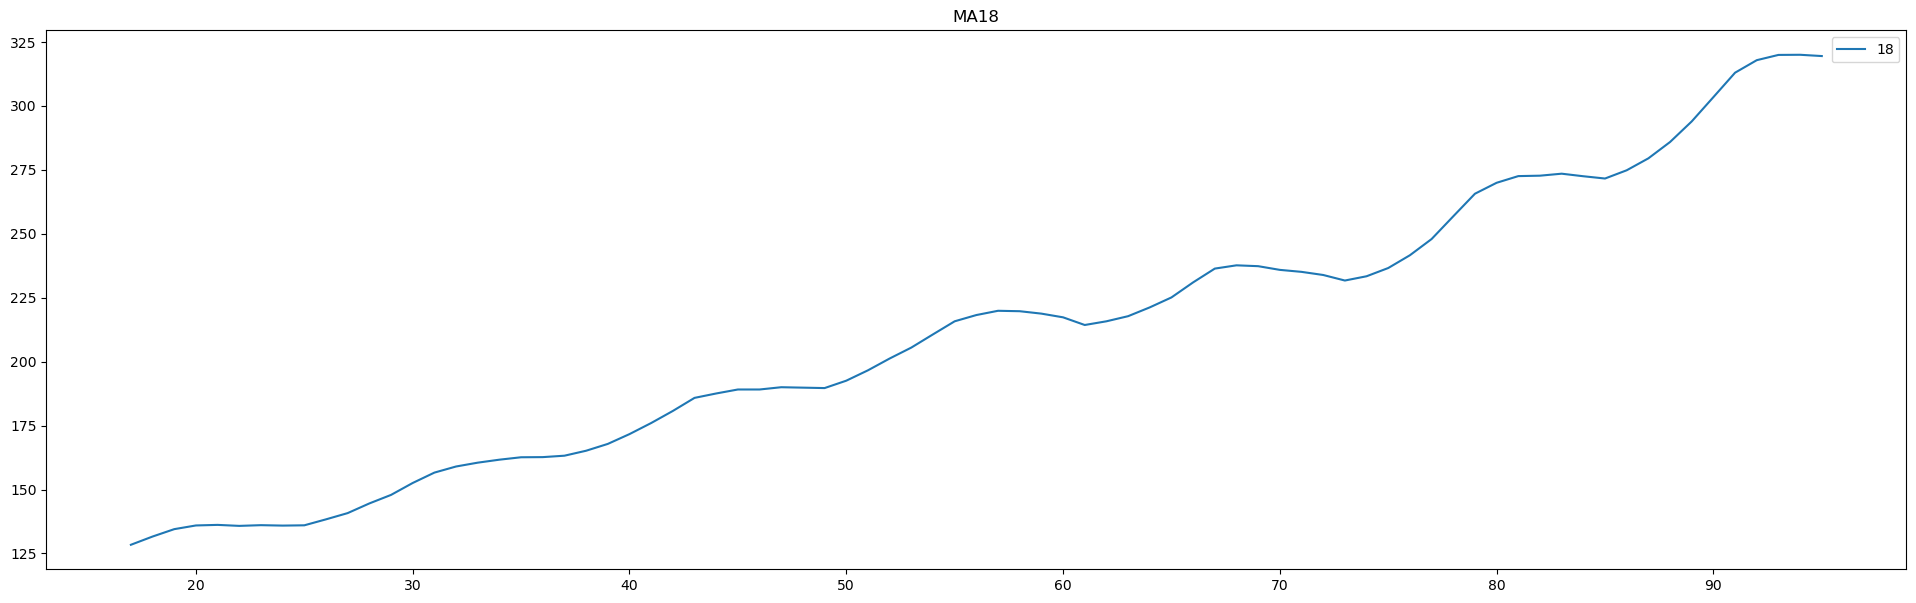

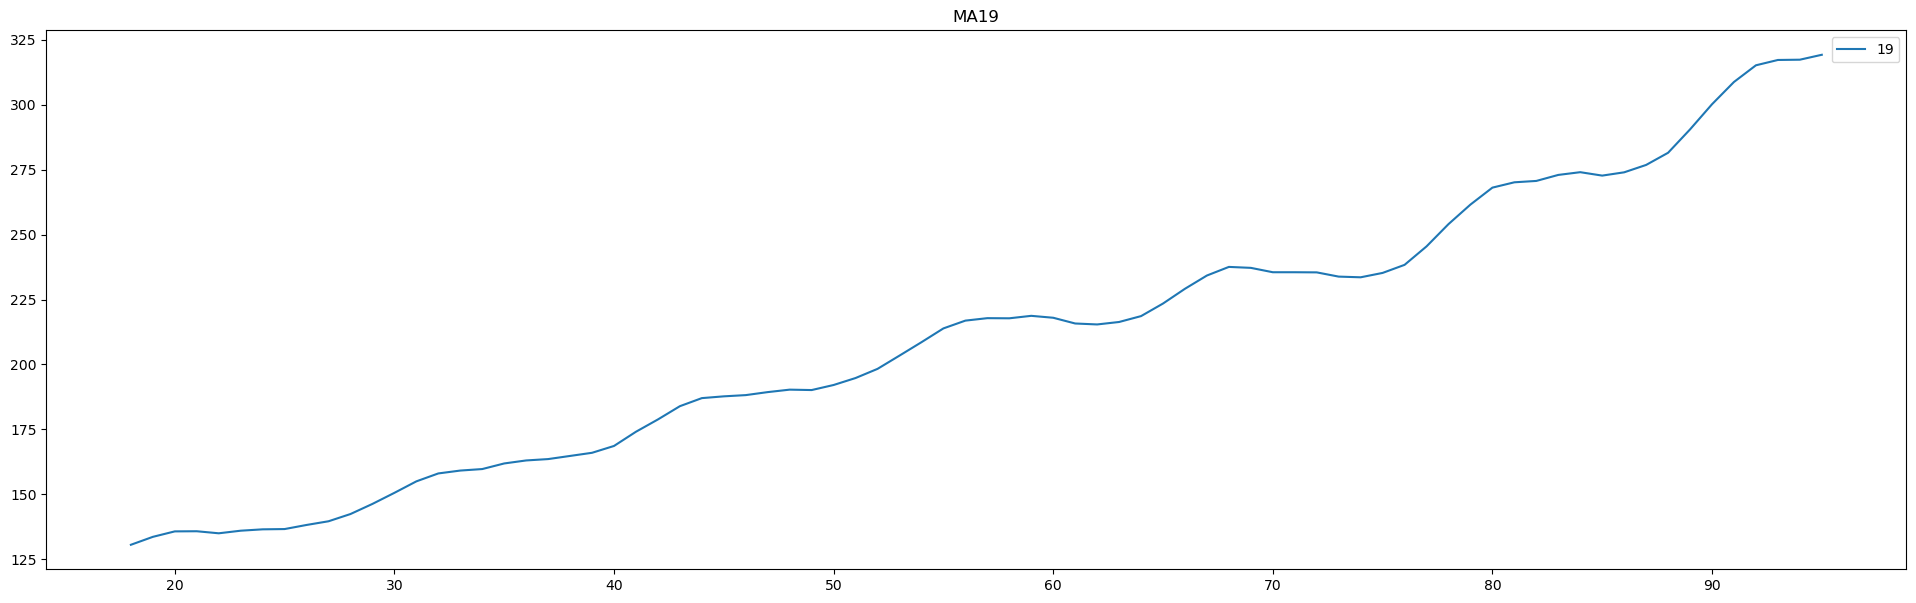

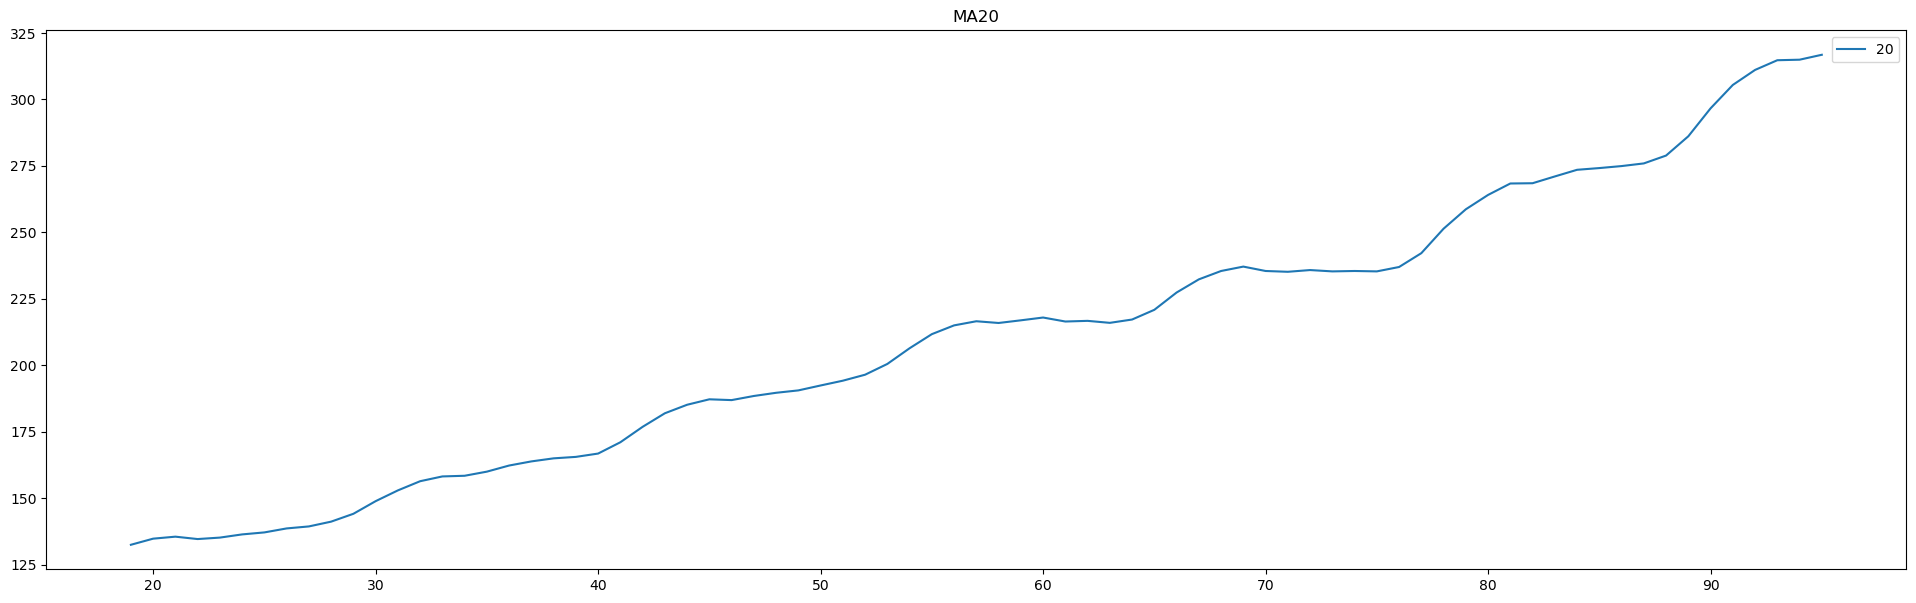

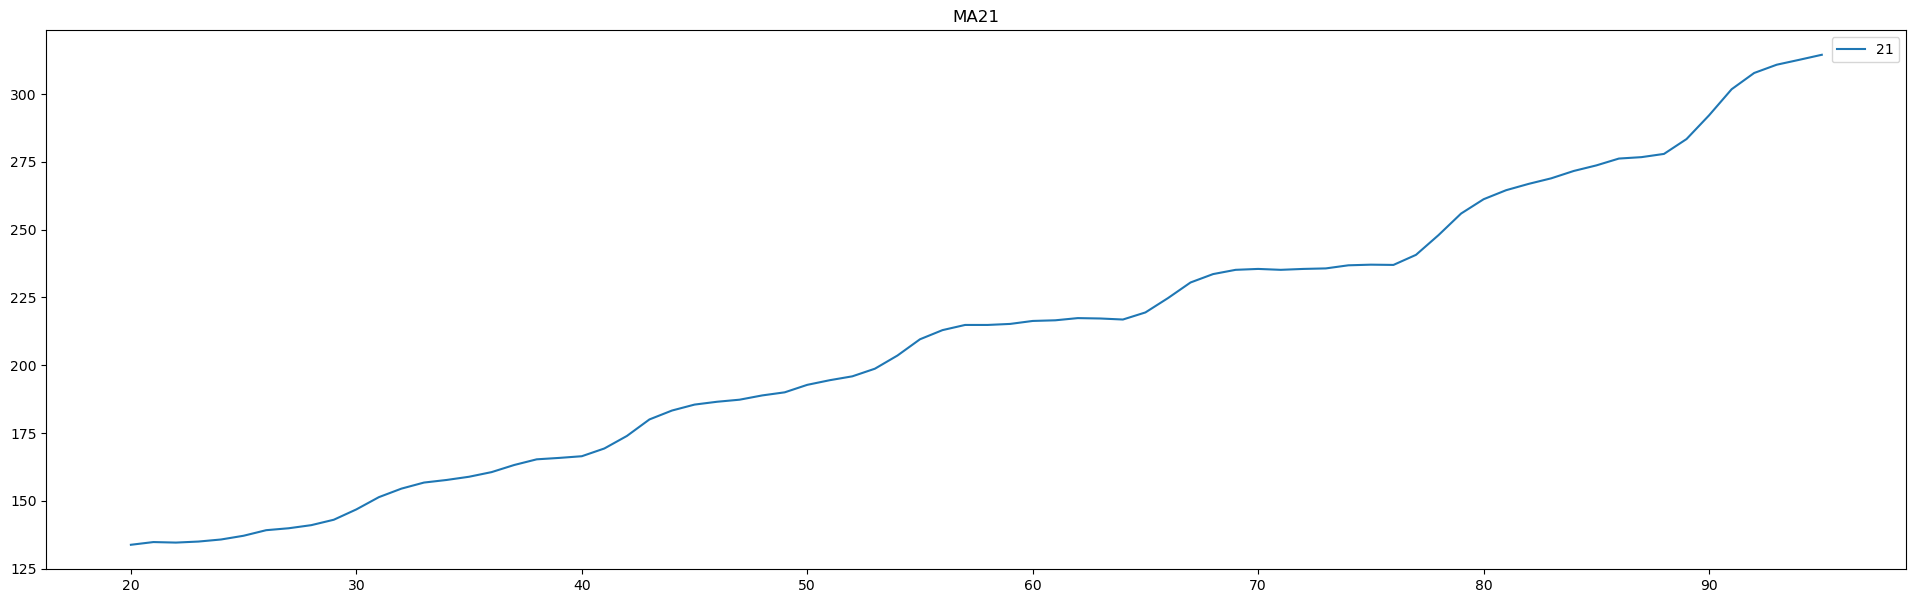

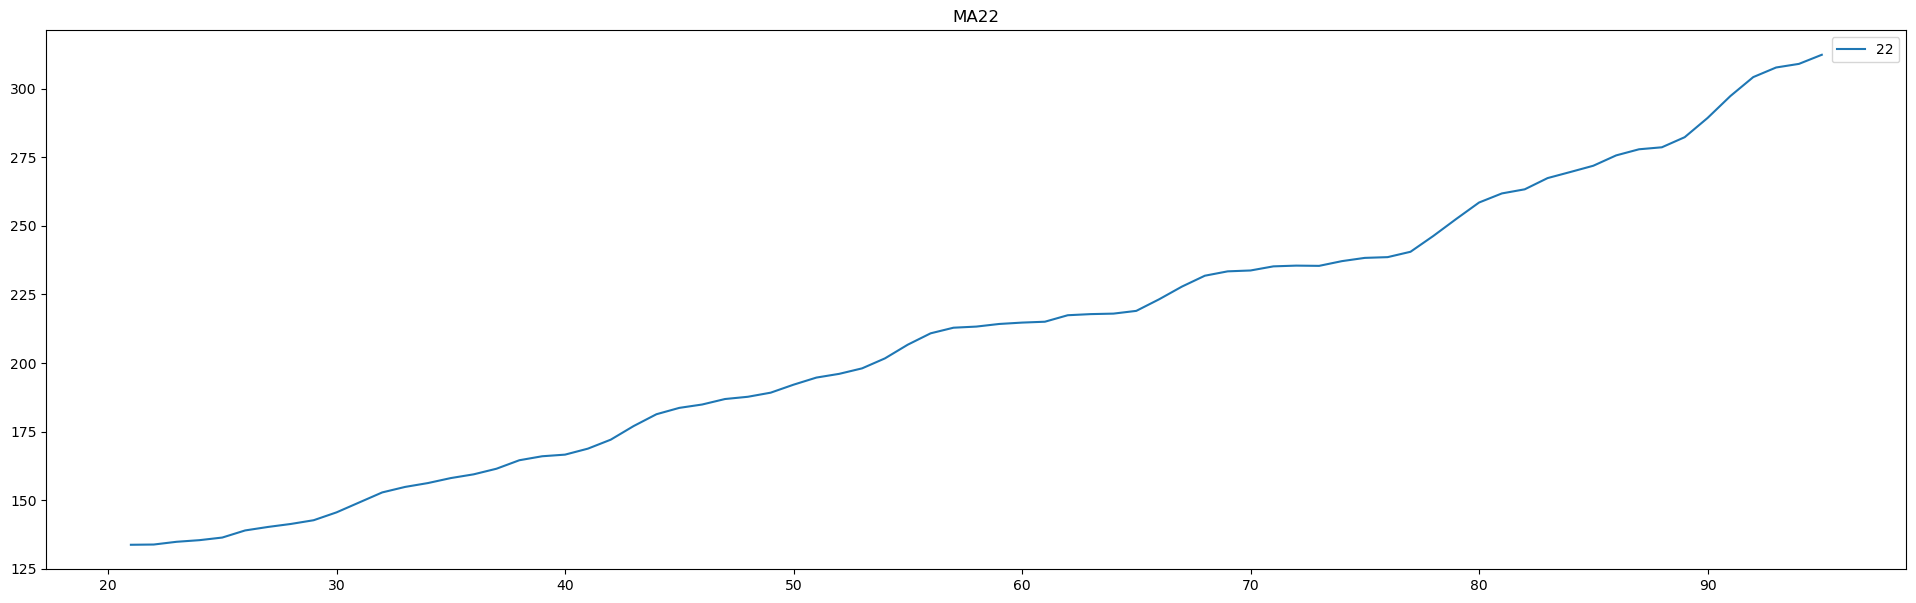

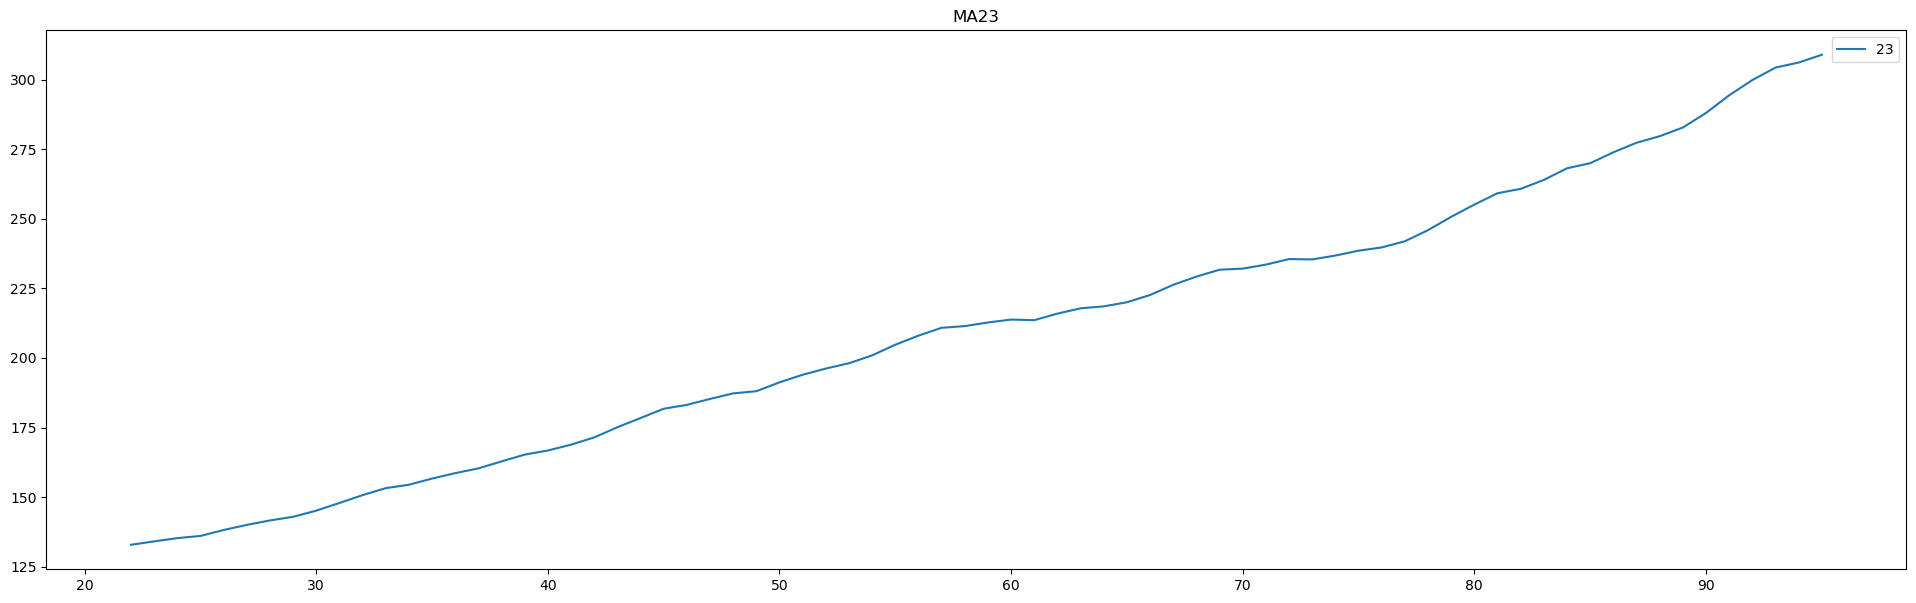

In [99]:
plt.figure(figsize=(24,7))
df.Passengers.plot(label="org")
for i in range(2,24):
    plt.figure(figsize=(24,7))
    df["Passengers"].rolling(i).mean().plot(label=str(i))
    plt.title("MA"+str(i))
    plt.legend(loc='best')
    plt.show()

# 5 - Time series decomposition plot
      - It is use for finding proper Trends,Seasonality of Target column

<Figure size 2400x2000 with 0 Axes>

<Figure size 2400x2000 with 0 Axes>

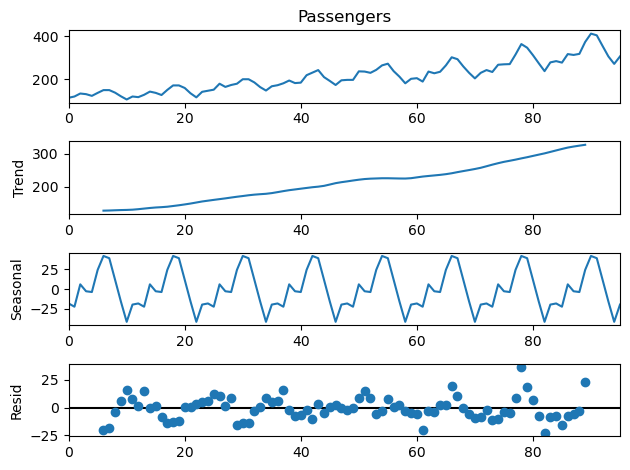

<Figure size 2400x2000 with 0 Axes>

In [100]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.figure(figsize=(24,20))
decompose_ts_add = seasonal_decompose(df.Passengers,period= 12) 
decompose_ts_add.plot()
plt.figure(figsize=(24,20))


- It shows Trend is Exponential and Sesonality is Multiplicative

# 5 - ACF plots and PACF plots
   - ACF -Autocorrelation plot
   - PACF-Partial auto-correlation function

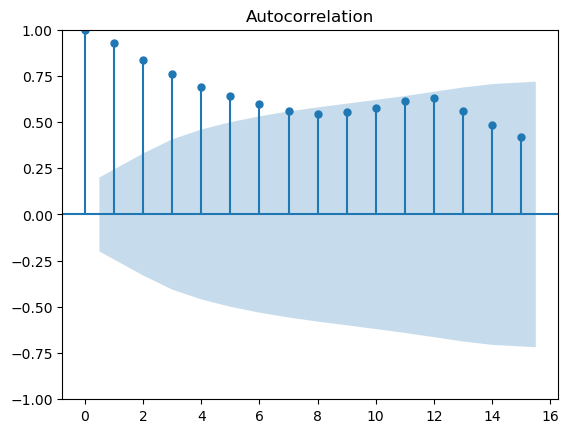

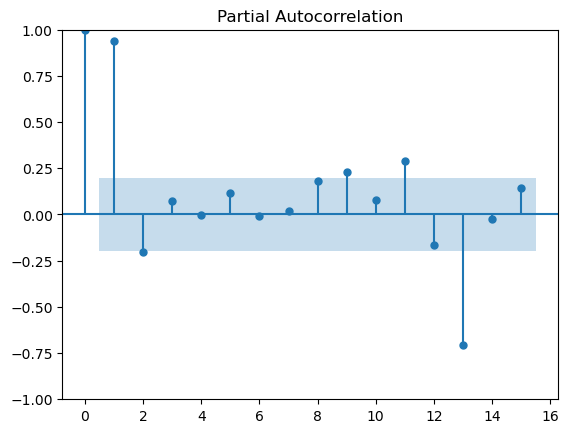

In [101]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(df.Passengers,lags=15)
tsa_plots.plot_pacf(df.Passengers,lags=15)
plt.show()

By acf plot , we can say that forcasting is possible upto 6 lag

In [102]:
df.set_index('Month')

,Passengers
Month,
1995-01-01,112
1995-02-01,118
1995-03-01,132
1995-04-01,129
1995-05-01,121
...,...
2002-08-01,405
2002-09-01,355
2002-10-01,306


In [103]:
df["Date"] = pd.to_datetime(df.Month,format="%b-%y")
#look for c standard format codes

# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

df["month"] = df.Date.dt.strftime("%b") # month extraction
df["year"] = df.Date.dt.strftime("%Y") # year extraction

#df["Day"] = df.Date.dt.strftime("%d") # Day extraction
#df["wkday"] = df.Date.dt.strftime("%A") # weekday extraction

In [104]:
df.head()

,Month,Passengers,Date,month,year
0,1995-01-01,112,1995-01-01,Jan,1995
1,1995-02-01,118,1995-02-01,Feb,1995
2,1995-03-01,132,1995-03-01,Mar,1995
3,1995-04-01,129,1995-04-01,Apr,1995
4,1995-05-01,121,1995-05-01,May,1995


<AxesSubplot:xlabel='month', ylabel='year'>

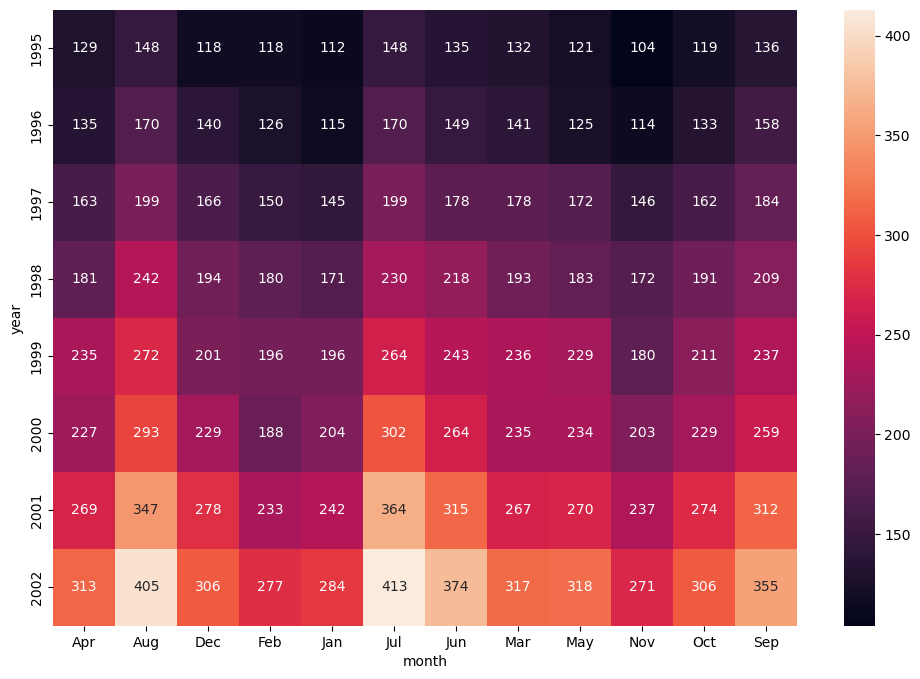

In [105]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=df,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values


<AxesSubplot:xlabel='year', ylabel='Passengers'>

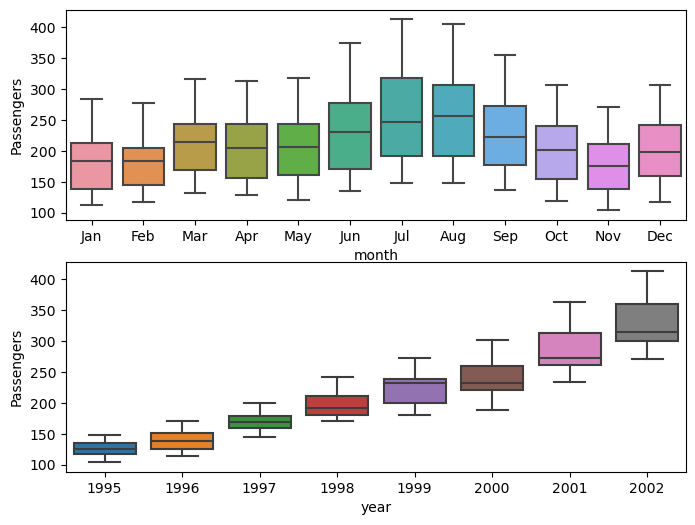

In [106]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=df)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=df)


<AxesSubplot:xlabel='year', ylabel='Passengers'>

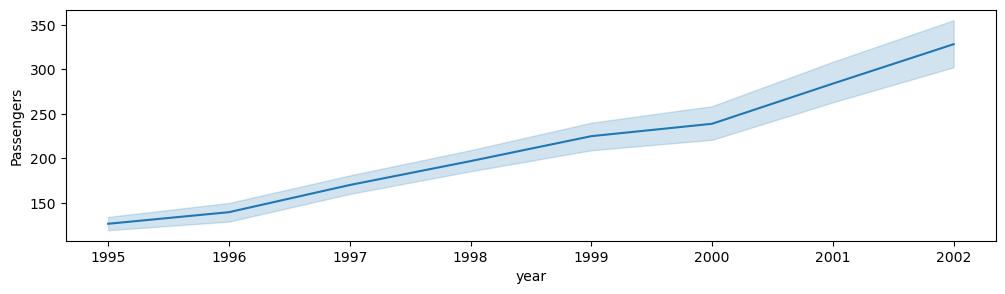

In [107]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=df)

In [108]:
# adding t values >> new variable 1
df['t']= np.arange(1,df.shape[0]+1) 
# adding t_sqr values >> new variable 2
df['t_square'] = df['t']**2
 #adding log_ values >> new variable 3
df['log_Passengers'] = np.log(df['Passengers'])
#Generating dummies for months
month_dummies = pd.DataFrame(pd.get_dummies(df['month']))
df = pd.concat([df,month_dummies],axis = 1)

In [109]:
df.head()

,Month,Passengers,Date,month,year,t,t_square,log_Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,1995-01-01,Jan,1995,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,1995-02-01,Feb,1995,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995-03-01,Mar,1995,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,1995-04-01,Apr,1995,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995-05-01,May,1995,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


# 6 - Splitting data

In [110]:
Train = df.head(76)
Test = df.tail(20)

<AxesSubplot:xlabel='Passengers', ylabel='Density'>

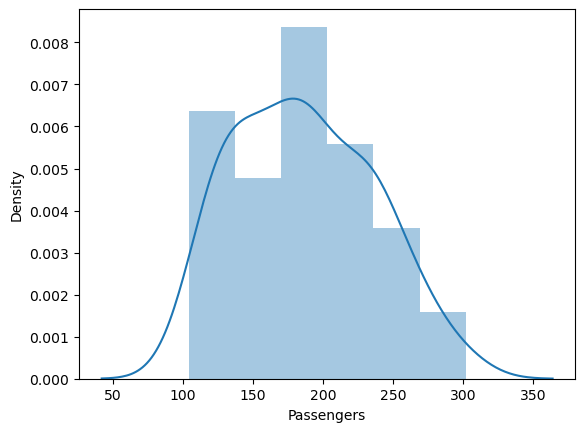

In [111]:
import seaborn as sns
sns.distplot(Train['Passengers'])

In [112]:
np.log(Train['Passengers'])

0     4.718499
1     4.770685
2     4.882802
3     4.859812
4     4.795791
        ...   
71    5.433722
72    5.488938
73    5.451038
74    5.587249
75    5.594711
Name: Passengers, Length: 76, dtype: float64

In [113]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

57.000147882565855

In [114]:
#Exponential

Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp


46.621543947193885

In [115]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.494274639472565

In [116]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.25413439949492

In [117]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

137.61090856256553

In [118]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea 

11.784250178760413

In [119]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

39.759766338055655

In [120]:
#Compare the results 

data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.784250
4,rmse_add_sea_quad,39.759766
1,rmse_Exp,46.621544
0,rmse_linear,57.000148
2,rmse_Quad,58.494275
3,rmse_add_sea,132.254134
5,rmse_Mult_sea,137.610909


Model Evaluation - Multiplicative Additive Seasonality

In [121]:
#Build the model on entire data set
model_full = smf.ols('log_Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=df).fit()

In [122]:
pred_new  = pd.Series(model_full.predict(df))
pred_new

0     4.679610
1     4.690898
2     4.834840
3     4.802751
4     4.796991
        ...   
91    5.968039
92    5.857037
93    5.726162
94    5.594949
95    5.730733
Length: 96, dtype: float64

In [123]:
df["forecasted_Passengers"] = pd.Series(np.exp(pred_new))

In [124]:
df

,Month,Passengers,Date,month,year,t,t_square,log_Passengers,Apr,Aug,...,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,forecasted_Passengers
0,1995-01-01,112,1995-01-01,Jan,1995,1,1,4.718499,0,0,...,0,1,0,0,0,0,0,0,0,107.728094
1,1995-02-01,118,1995-02-01,Feb,1995,2,4,4.770685,0,0,...,1,0,0,0,0,0,0,0,0,108.950966
2,1995-03-01,132,1995-03-01,Mar,1995,3,9,4.882802,0,0,...,0,0,0,0,1,0,0,0,0,125.818440
3,1995-04-01,129,1995-04-01,Apr,1995,4,16,4.859812,1,0,...,0,0,0,0,0,0,0,0,0,121.845099
4,1995-05-01,121,1995-05-01,May,1995,5,25,4.795791,0,0,...,0,0,0,0,0,1,0,0,0,121.145299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,2002,92,8464,6.003887,0,1,...,0,0,0,0,0,0,0,0,0,390.738658
92,2002-09-01,355,2002-09-01,Sep,2002,93,8649,5.872118,0,0,...,0,0,0,0,0,0,0,0,1,349.686530
93,2002-10-01,306,2002-10-01,Oct,2002,94,8836,5.723585,0,0,...,0,0,0,0,0,0,0,1,0,306.789691
94,2002-11-01,271,2002-11-01,Nov,2002,95,9025,5.602119,0,0,...,0,0,0,0,0,0,1,0,0,269.063940


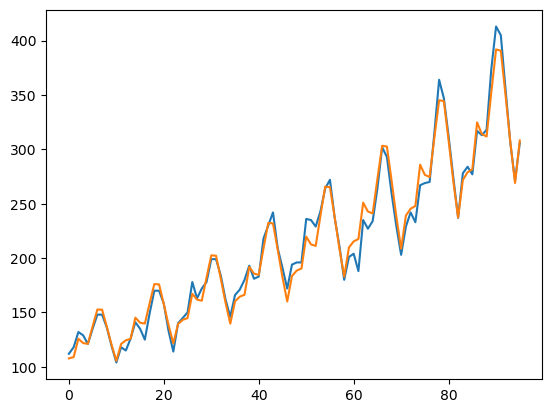

In [125]:
plt.plot(df[['Passengers','forecasted_Passengers']].reset_index(drop=True))